<a href="https://colab.research.google.com/github/Tanvi-Gajula/Projects/blob/main/Image_Registration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

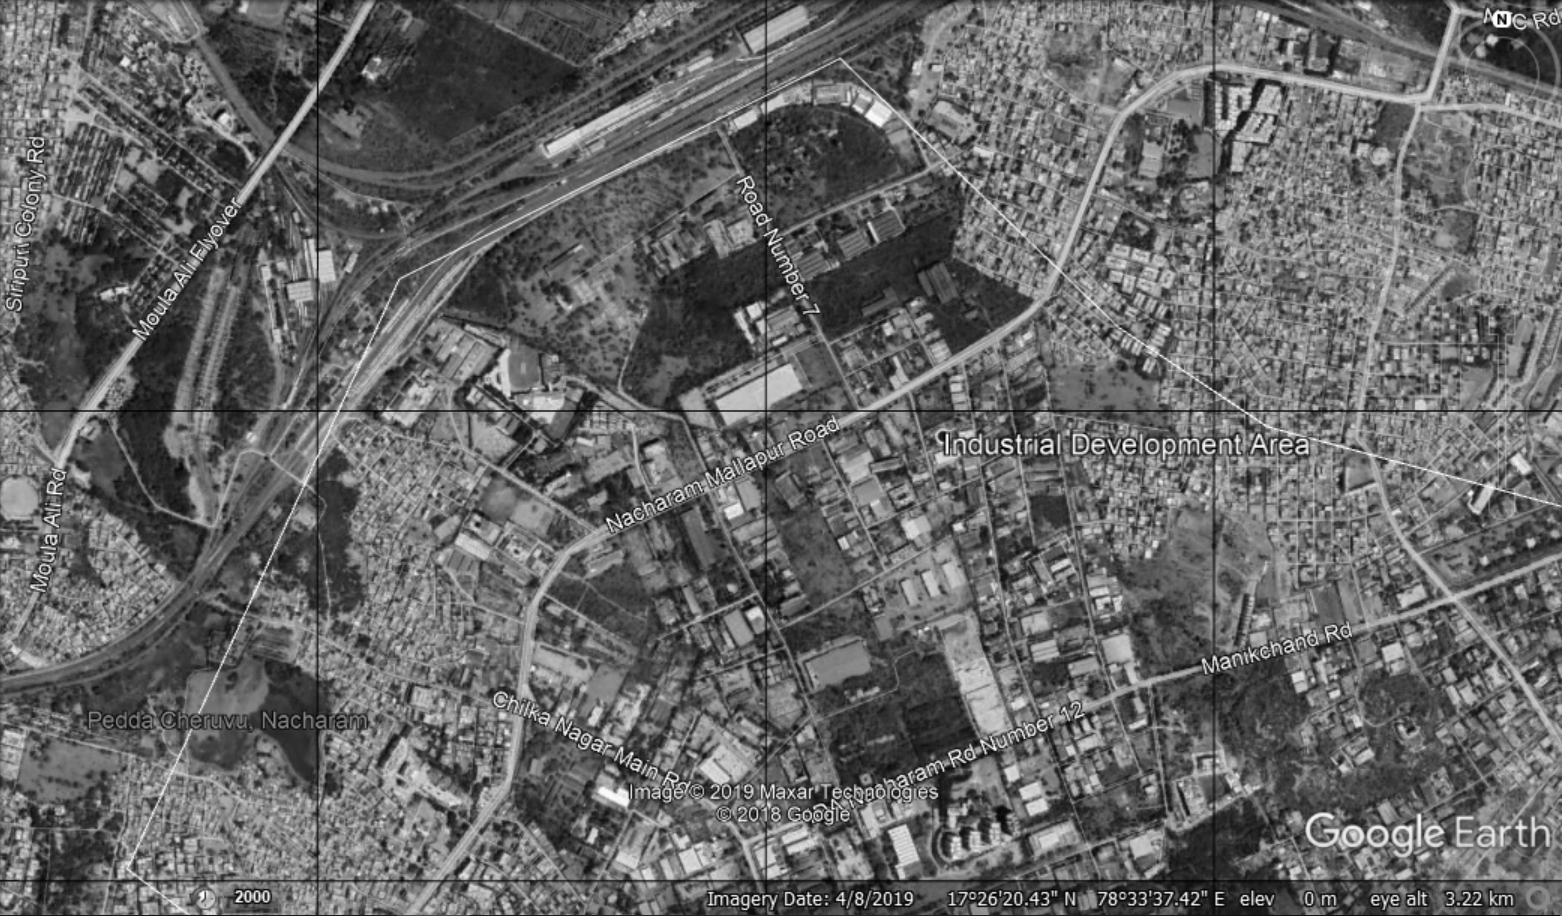

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

img1 = cv.imread('/content/rmcimag.png', cv.IMREAD_GRAYSCALE)
cv2_imshow(img1)

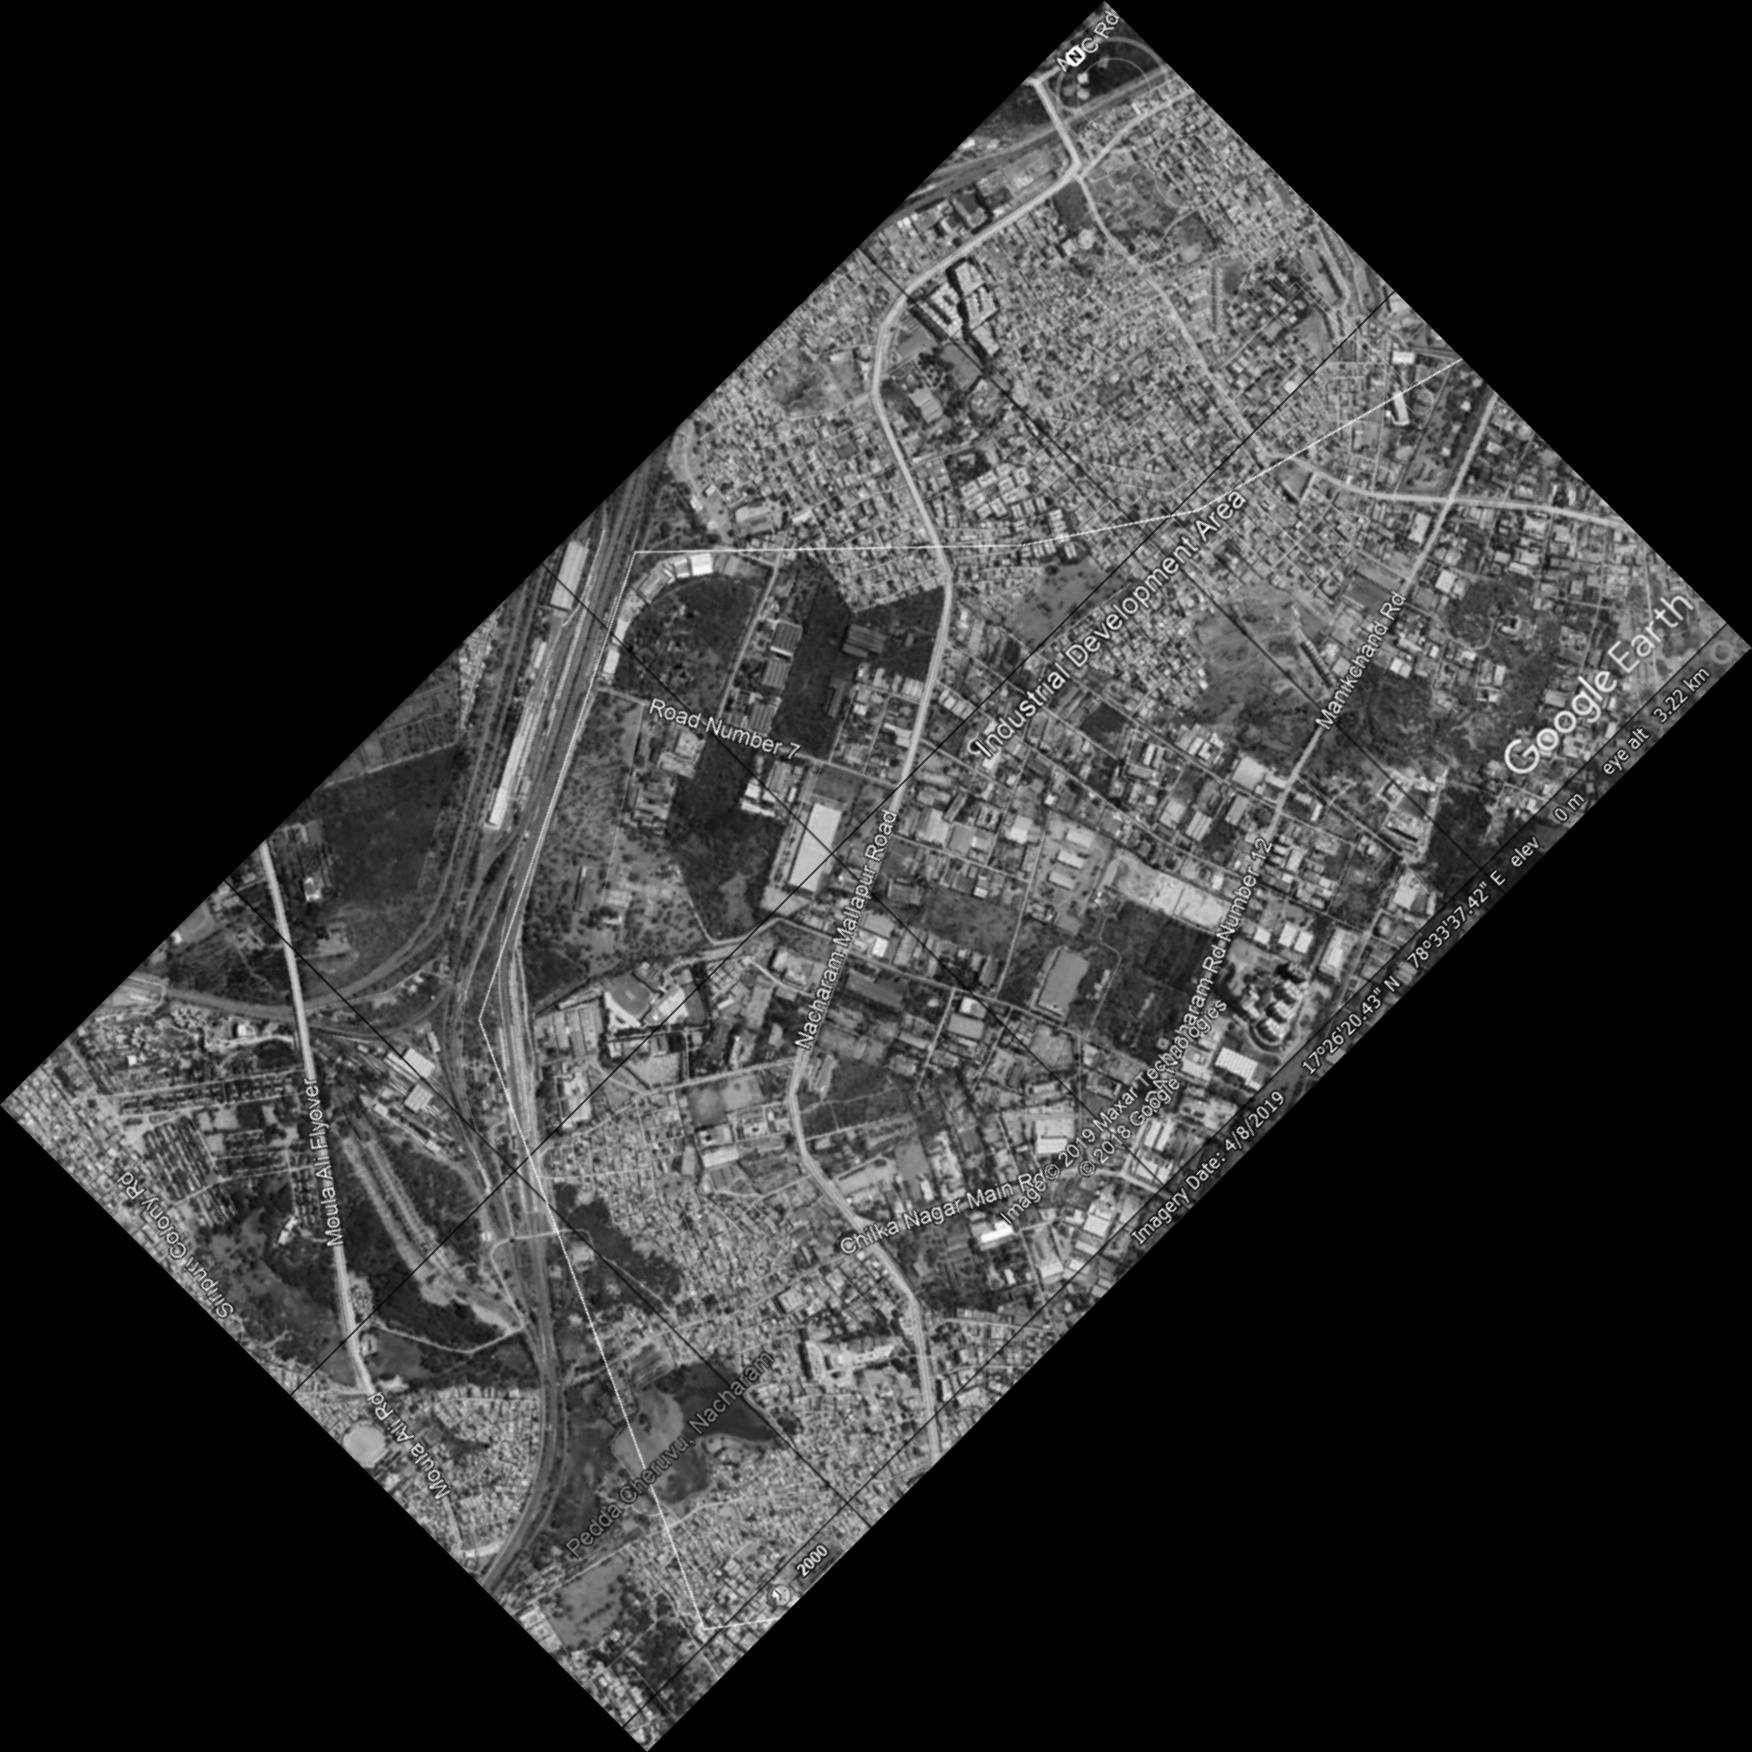

In [ ]:
import cv2 as cv, cv2
from google.colab.patches import cv2_imshow

rotation_angle = 45

rows, cols = img1.shape

rotation_matrix = cv.getRotationMatrix2D((cols/2, rows/2), rotation_angle, 1)

cos_theta = abs(rotation_matrix[0, 0])
sin_theta = abs(rotation_matrix[0, 1])
new_width = int(rows * sin_theta + cols * cos_theta)
new_height = int(rows * cos_theta + cols * sin_theta)

rotation_matrix[0, 2] += (new_width - cols) / 2
rotation_matrix[1, 2] += (new_height - rows) / 2

img2 = cv.warpAffine(img1, rotation_matrix, (new_width, new_height), flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)

cv2_imshow(img2)

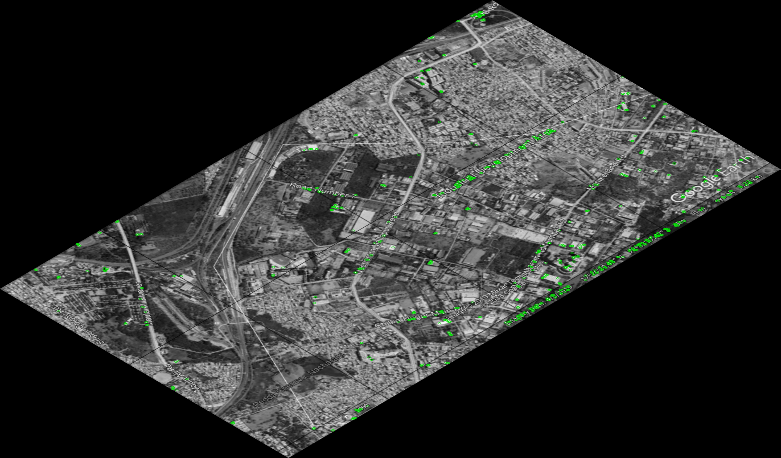

In [ ]:
from google.colab.patches import cv2_imshow

height, width = img1.shape

orb_detector = cv2.ORB_create(1000)

keyPoint1, des1 = orb_detector.detectAndCompute(img2, None)
keyPoint2, des2 = orb_detector.detectAndCompute(img1, None)

imgKp_Ref = cv2.drawKeypoints(img2, keyPoint1, 0, (0, 222, 0), None)
imgKp_Ref = cv2.resize(imgKp_Ref, (width // 2, height // 2))

cv2_imshow(imgKp_Ref)

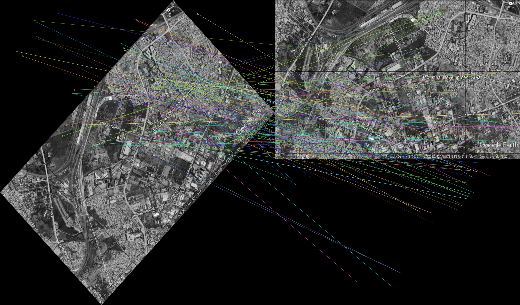

In [ ]:
matches = list(matches)

matches.sort(key=lambda x: x.distance)

matches = matches[:int(len(matches) * 0.9)]

no_of_matches = len(matches)

imgMatch = cv2.drawMatches(img2, keyPoint2, img1, keyPoint1, matches[:100], None, flags=2)
imgMatch = cv2.resize(imgMatch, (width // 3, height // 3))

from google.colab.patches import cv2_imshow
cv2_imshow(imgMatch)

In [ ]:
import numpy as np

p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))

for i in range(len(matches)):
    p1[i, :] = keyPoint1[matches[i].queryIdx].pt
    p2[i, :] = keyPoint2[matches[i].trainIdx].pt

homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)

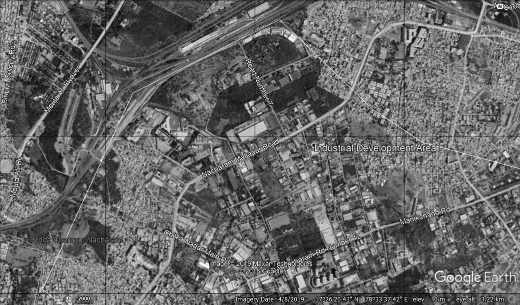

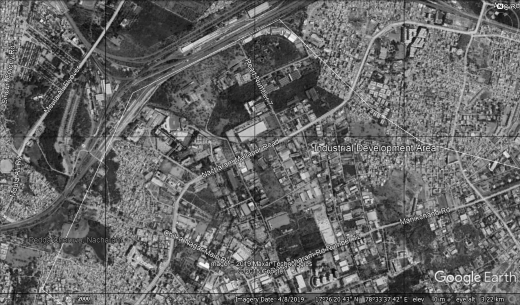

In [ ]:
aligned_img = cv2.warpPerspective(img2, homography, (width, height))

aligned_img = cv2.resize(aligned_img, (width // 3, height // 3))

imgTest_cp = img1.copy()
imgTest_cp = cv2.resize(imgTest_cp, (width // 3, height // 3))

from google.colab.patches import cv2_imshow
cv2_imshow(imgTest_cp)
cv2_imshow(aligned_img)

In [ ]:
import cv2

if img1.shape != aligned_img.shape:
    aligned_img = cv2.resize(aligned_img, (img1.shape[1], img1.shape[0]))

In [ ]:
from skimage.metrics import structural_similarity as ssim
import cv2

ssim_value = ssim(img1, aligned_img)

print("Structural Similarity Index (SSIM):", ssim_value)

Structural Similarity Index (SSIM): 0.8103699425741794
